# Рынок заведений общественного питания Москвы

**Задача:** подготовить исследование рынка общественного питания в Москве из открытых источников. 

**Цель:** привлечение инвестиций, чтобы открыть оригинальное кафе с роботами в Москве. 

Данные взяты из открытых источников и содержат в себе название, тип, адрес объекта общественного питания и его вместительность. 

### План работы над проектом
- [Импорт данных](#step1);
- [Предобработка данных](#step2);
- [Анализ данных](#step3);
- [Общий вывод](#step4);
- [Презентация](#step5).

<div id='step1'/>

## Импортируем данные:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
import plotly.io as pio

pio.renderers
pio.renderers.default = "svg"

In [4]:
rest_data = pd.read_csv('rest_data.csv')

<div id='step2'/>

## Предобработка данных

In [5]:
def standart_opening(data):
    data.info()
    print('--------------------------------------')
    print('Дубликаты:')
    print (data.duplicated().sum(), 'дубликатов')
    print('--------------------------------------')
    print('Пропуски:')
    print (data.isna().mean())
    print('--------------------------------------')
    print('Начало таблицы')
    print (data.head())
    print('--------------------------------------')
    print('Конец таблицы')
    print (data.tail())

standart_opening(rest_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB
--------------------------------------
Дубликаты:
0 дубликатов
--------------------------------------
Пропуски:
id             0.0
object_name    0.0
chain          0.0
object_type    0.0
address        0.0
number         0.0
dtype: float64
--------------------------------------
Начало таблицы
       id             object_name chain object_type  \
0  151635                 СМЕТАНА   нет        кафе   
1   77874                  Родник   нет        кафе   
2   24309         Кафе «Академия»   нет        кафе 

Пропусков и полных дубликатов нет, типы данных указаны корректно. Можно приступать к анализу.

<div id='step3'/>

## Анализ данных

Исследуем соотношение видов объектов общественного питания по количеству:

In [6]:
rest_data.sample()

,id,object_name,chain,object_type,address,number
14544,219368,ТАНДЫР,нет,предприятие быстрого обслуживания,"город Москва, Балаклавский проспект, дом 5А",0


In [7]:
object_data = rest_data.groupby('object_type').agg({'id' : 'count'}).reset_index()
object_data.columns = ['object_type', 'id']
object_data['propotrion'] = ((object_data['id']/object_data['id'].sum()) *100).round(2)
object_data

,object_type,id,propotrion
0,бар,856,5.57
1,буфет,585,3.81
2,закусочная,360,2.34
3,кафе,6099,39.69
4,кафетерий,398,2.59
5,магазин (отдел кулинарии),273,1.78
6,предприятие быстрого обслуживания,1923,12.51
7,ресторан,2285,14.87
8,столовая,2587,16.84


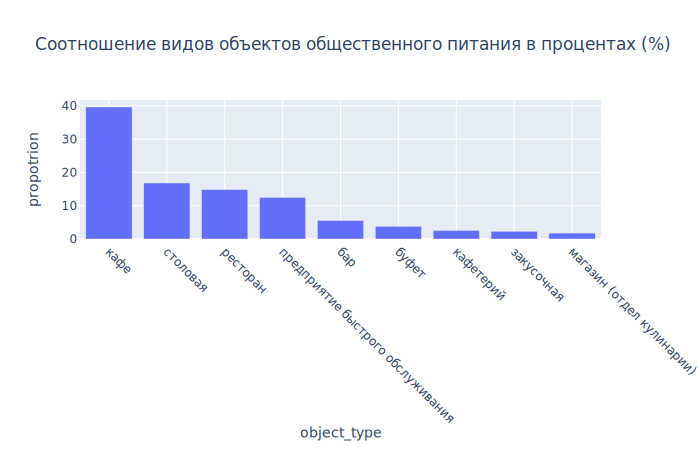

In [8]:
fig = px.bar(object_data.sort_values(by='propotrion', ascending=False), 
             x='object_type', y='propotrion', 
             title='Cоотношение видов объектов общественного питания в процентах (%)')
fig.update_xaxes(tickangle=45)
fig.show()

39,7% - кафе, 16,8% - столовая, 14,9% - закусочная, 12,5% - предприятие быстрого обслуживания. Я удивлена, что увидела столовую и закусочную в топ-3. А ресторанов всего 5,57%

Исследуем соотношение сетевых и несетевых заведений по количеству:

In [9]:
rest_data.sample()

,id,object_name,chain,object_type,address,number
15320,204987,Милти,да,кафе,"город Москва, Большая Серпуховская улица, дом ...",6


In [10]:
chain_data = rest_data.groupby('chain').agg({'id' : 'count'}).reset_index()
chain_data.columns = ['chain', 'id']
chain_data['propotrion'] = ((chain_data['id']/chain_data['id'].sum()) *100).round(2)
chain_data

,chain,id,propotrion
0,да,2968,19.32
1,нет,12398,80.68


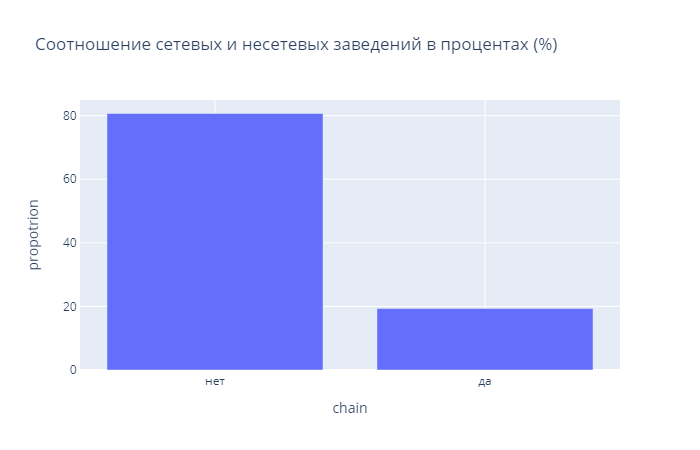

In [11]:
fig = px.bar(chain_data.sort_values(by='propotrion', ascending=False), 
             x='chain', y='propotrion', 
             title='Cоотношение сетевых и несетевых заведений в процентах (%)')
fig.show("png")

Только 19,3% всего московского общепита входят - сетевые, остальные 80,7% - нет. 

In [12]:
chain_object_data = rest_data.query('chain == "да"').groupby('object_type').agg({'id' : 'count'}).reset_index()
chain_object_data.columns = ['object_type', 'id']
chain_object_data['propotrion'] = ((chain_object_data['id']/chain_object_data['id'].sum()) *100).round(2)
chain_object_data

,object_type,id,propotrion
0,бар,37,1.25
1,буфет,11,0.37
2,закусочная,56,1.89
3,кафе,1396,47.04
4,кафетерий,52,1.75
5,магазин (отдел кулинарии),78,2.63
6,предприятие быстрого обслуживания,791,26.65
7,ресторан,544,18.33
8,столовая,3,0.10


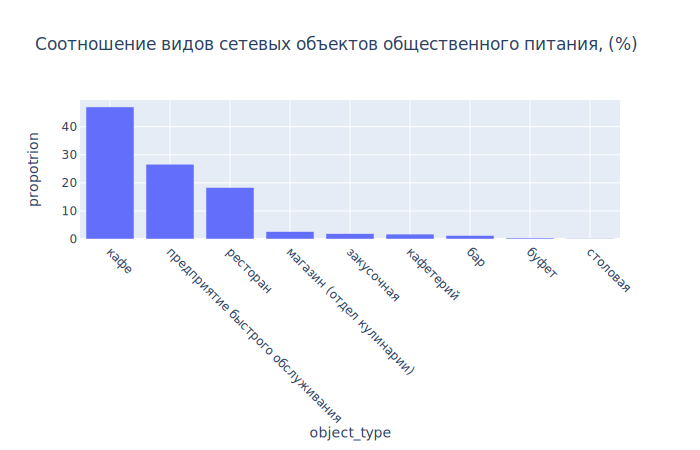

In [13]:
fig = px.bar(chain_object_data.sort_values(by='propotrion', ascending=False), 
             x='object_type', y='propotrion', 
             title='Cоотношение видов сетевых объектов общественного питания, (%)')
fig.update_xaxes(tickangle=45)
fig.show()

Соотношение видов сетевого общепита выглядит так: 47% - кафе, 26,65% - фаст-фуд, 18,3% - рестораны. 

Изучим соотношение сетевых и несетевых объектов питания:

In [14]:
tmp1 = rest_data\
    .groupby(['object_type'], as_index=False)\
    .agg({'id':'count'})\
    .rename(columns={'id':'cnt_all'})

tmp = rest_data\
    .groupby(['object_type', 'chain'], as_index=False)\
    .agg({'id':'count'})\
    .rename(columns={'id':'cnt'})\
    .merge(
        tmp1, on='object_type', how='inner'
    ).sort_values(by='cnt_all', ascending=False)
display(tmp.head())

,object_type,chain,cnt,cnt_all
6,кафе,да,1396,6099
7,кафе,нет,4703,6099
17,столовая,нет,2584,2587
16,столовая,да,3,2587
15,ресторан,нет,1741,2285


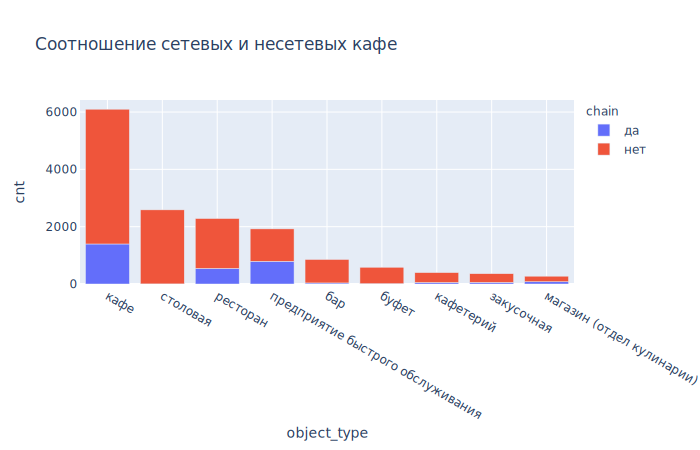

In [15]:
fig = px.bar(tmp, x='object_type', y='cnt', color='chain',
                 title='Cоотношение сетевых и несетевых кафе')
fig.show()

Сетевые заведения составляют значительную часть в трех основных категориях: кафе, ресторан, предприятие быстрого обслуживания. Для кафе и ресторанов доля сетевых около 25%, а для фастфуда - это почти половина.  


Построим график совместного распределения для сетевых объектов:

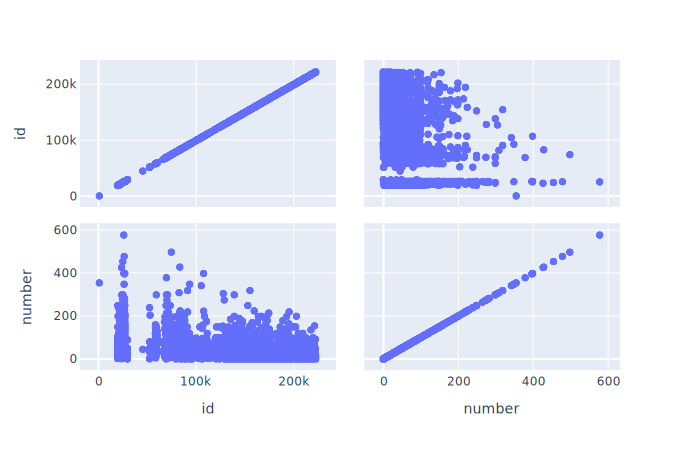

In [16]:
fig = px.scatter_matrix(rest_data.query('chain == "да"'),
    dimensions=["id", "number"])
fig.show()

Судя по графику, чаще встречаеются объекты с небольшим количеством столиков. 

Опишем среднее количество посадочных мест: 

In [17]:
number_data = rest_data.groupby('object_type').agg({'number' : 'mean'}).reset_index().round(2)
number_data.columns = ['object_type', 'number']
number_data

,object_type,number
0,бар,43.49
1,буфет,51.13
2,закусочная,7.61
3,кафе,39.72
4,кафетерий,9.12
5,магазин (отдел кулинарии),5.59
6,предприятие быстрого обслуживания,20.55
7,ресторан,96.83
8,столовая,130.25


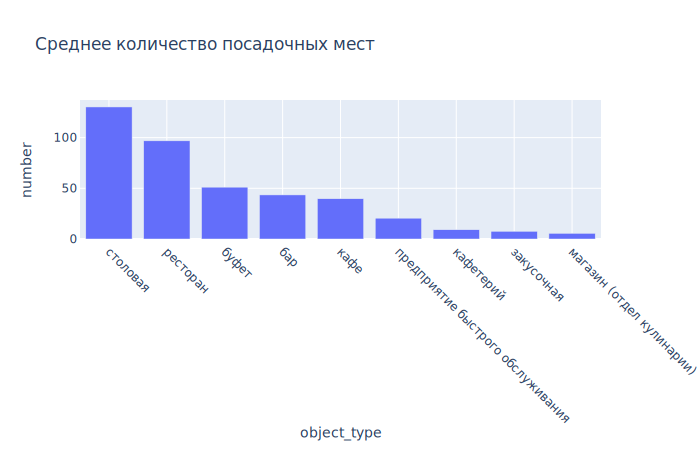

In [18]:
fig = px.bar(number_data.sort_values(by='number', ascending=False), 
             x='object_type', y='number', 
             title='Cреднее количество посадочных мест')
fig.update_xaxes(tickangle=45)
fig.show()

Наибольшее среднее количество посадочных мест в столовых (130), ресторанах (97), буфетах (51) и кафе (40). В фаст-фуде в среднем 20 мест, в остальных категориях - меньше 10. 

Построим график топ-10 улиц по количеству объектов общественного питания. 

Для этого выделим в отдельный столбец информацию об улице из столбца `address` .

In [19]:
#Используем метод str.split() 
rest_data['street'] = rest_data['address'].str.split(", ", n=2, expand=True)[1]
rest_data.sample()

,id,object_name,chain,object_type,address,number,street
2946,23704,СТОЛОВАЯ Структурное подразделение №4 ГБОУ ШКО...,нет,столовая,"город Москва, Большая Очаковская улица, дом 18",80,Большая Очаковская улица


In [20]:
rest_data['street'].value_counts().head(10)

город Зеленоград          232
проспект Мира             204
Профсоюзная улица         182
Ленинградский проспект    171
Пресненская набережная    167
Варшавское шоссе          161
Ленинский проспект        147
поселение Сосенское       138
проспект Вернадского      132
Кутузовский проспект      114
Name: street, dtype: int64

Так, на первом месте город Зеленоград. Еще в топ прокралось поселение Сосенское - это все не улицы Москвы, поэтому я исключу их из топ-10. 

In [21]:
top_10_str = rest_data.query('street != "город Зеленоград" and street != "поселение Сосенское"')
top_10_streets = top_10_str['street'].value_counts().head(10).index.values
top_10_streets

array(['проспект Мира', 'Профсоюзная улица', 'Ленинградский проспект',
       'Пресненская набережная', 'Варшавское шоссе', 'Ленинский проспект',
       'проспект Вернадского', 'Кутузовский проспект', 'Каширское шоссе',
       'Кировоградская улица'], dtype=object)

In [22]:
top_10_str_data = rest_data.query('street in @top_10_streets')

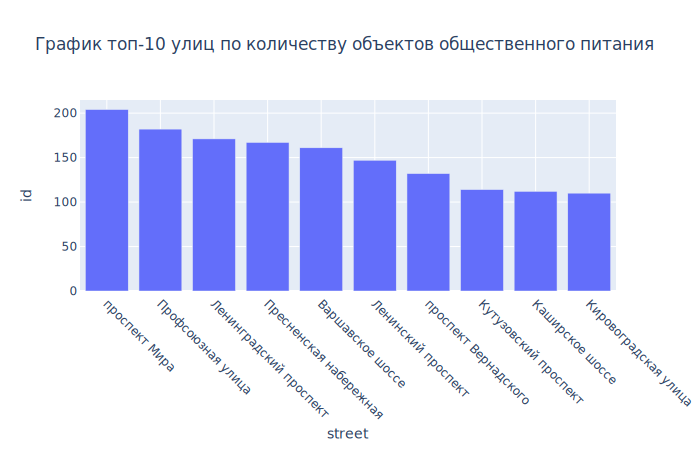

In [23]:
top_10 = top_10_str_data.groupby('street').agg({'id' : 'count'}).sort_values(by='id', ascending=False).reset_index()
top_10.columns = ['street', 'id']
fig = px.bar(top_10, 
             x='street', y='id', 
             title='График топ-10 улиц по количеству объектов общественного питания')
fig.update_xaxes(tickangle=45)
fig.show()

Самые популяные улицы - это проспект Мира, Профсоюзная улица, Ленинградский проспект, Пресненская набережная, Варшавское шоссе, Ленинский проспект, проспект Вернадского, Кутузовский проспект, Каширское шоссе, Кировоградская улица. 
Больше всего заведений общепита на проспекте Мира, Профсоюзной улице и Ленинградском проспекте (204, 182, 171), замыкает топ-10 Кировоградская улица с 110 точками. Посмотрим, через какие районы проходят эти  магистрали. Для этого я скачала базу данных из открытого источника. 

Данные, которыми я пользовалась можно скачать из облака по ссылке. Он в открытом доступе:
https://drive.google.com/file/d/1S57LADPxVaSQWEkdyEMA3cxMRCfZepx3/view?usp=sharing

In [24]:
mos_data = pd.read_csv('mos_data.csv')

In [25]:
mos_data.head()

,Unnamed: 0,address,district
0,0,"город Москва, Варшавское шоссе, дом 150, строе...",муниципальный округ Чертаново Южное
1,1,"город Москва, Косинская улица, дом 26А",муниципальный округ Вешняки
2,2,"город Москва, Гороховский переулок, дом 21",муниципальный округ Басманный
3,3,"город Москва, Тагильская улица, дом 4, строени...",муниципальный округ Метрогородок
4,4,"город Москва, Ленинградский проспект, дом 73А,...",муниципальный округ Сокол


Выделим из данных нужные нам столбцы и соединим их с нашей таблицей. 

In [26]:
district_data = mos_data[['address', 'district']]
district_data.head()

,address,district
0,"город Москва, Варшавское шоссе, дом 150, строе...",муниципальный округ Чертаново Южное
1,"город Москва, Косинская улица, дом 26А",муниципальный округ Вешняки
2,"город Москва, Гороховский переулок, дом 21",муниципальный округ Басманный
3,"город Москва, Тагильская улица, дом 4, строени...",муниципальный округ Метрогородок
4,"город Москва, Ленинградский проспект, дом 73А,...",муниципальный округ Сокол


In [27]:
full_rest_data = rest_data.merge(district_data, on = 'address')
full_rest_data.head()

,id,object_name,chain,object_type,address,number,street,district
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова,муниципальный округ Ярославский
1,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица,муниципальный округ Таганский
2,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица,муниципальный округ Лианозово
3,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица,муниципальный округ Лианозово
4,199543,"Шаурма, выпечка",нет,предприятие быстрого обслуживания,"город Москва, Абрамцевская улица, дом 9, корпус 1",0,Абрамцевская улица,муниципальный округ Лианозово


In [28]:
full_top_10_data = full_rest_data.query('street in @top_10_streets')
full_top_10_data.head()

,id,object_name,chain,object_type,address,number,street,district
170,155973,Кафе «Андерсон»,да,кафе,"город Москва, Варшавское шоссе, дом 2",150,Варшавское шоссе,муниципальный округ Донской
171,204776,Кальян Бар,нет,бар,"город Москва, Варшавское шоссе, дом 2",24,Варшавское шоссе,муниципальный округ Донской
172,23618,Кафе «Subway»,да,кафе,"город Москва, Варшавское шоссе, дом 7, корпус 1",36,Варшавское шоссе,муниципальный округ Донской
173,166556,Кафе Суши Wok,да,предприятие быстрого обслуживания,"город Москва, Варшавское шоссе, дом 7, корпус 1",8,Варшавское шоссе,муниципальный округ Донской
174,181111,Кафе «Doner City»,нет,предприятие быстрого обслуживания,"город Москва, Варшавское шоссе, дом 7, корпус 1",1,Варшавское шоссе,муниципальный округ Донской


Сгруппируем по самым популярным улицам, чтобы определить районы, через которые они проходят. 

In [29]:
t_10 = pd.DataFrame(full_top_10_data.groupby('street')['district'].apply(set)).reset_index()
t_10.columns = ['street', 'district']
pd.options.display.max_colwidth = 500
t_10

,street,district
0,Варшавское шоссе,"{муниципальный округ Южное Бутово, муниципальный округ Чертаново Северное, муниципальный округ Донской, муниципальный округ Нагатино-Садовники, муниципальный округ Чертаново Центральное, муниципальный округ Чертаново Южное, муниципальный округ Нагорный}"
1,Каширское шоссе,"{муниципальный округ Орехово-Борисово Южное, муниципальный округ Орехово-Борисово Северное, муниципальный округ Нагатино-Садовники, муниципальный округ Москворечье-Сабурово}"
2,Кировоградская улица,"{муниципальный округ Чертаново Центральное, муниципальный округ Чертаново Южное, муниципальный округ Чертаново Северное}"
3,Кутузовский проспект,"{муниципальный округ Фили-Давыдково, муниципальный округ Дорогомилово}"
4,Ленинградский проспект,"{муниципальный округ Хорошевский, муниципальный округ Аэропорт, муниципальный округ Сокол, муниципальный округ Беговой}"
5,Ленинский проспект,"{муниципальный округ Ломоносовский, муниципальный округ Донской, муниципальный округ Теплый Стан, муниципальный округ Тропарево-Никулино, муниципальный округ Гагаринский, муниципальный округ Обручевский, муниципальный округ Проспект Вернадского, муниципальный округ Якиманка}"
6,Пресненская набережная,{муниципальный округ Пресненский}
7,Профсоюзная улица,"{муниципальный округ Черемушки, муниципальный округ Ясенево, муниципальный округ Коньково, муниципальный округ Теплый Стан, муниципальный округ Обручевский, муниципальный округ Академический}"
8,проспект Вернадского,"{муниципальный округ Ломоносовский, муниципальный округ Тропарево-Никулино, муниципальный округ Гагаринский, муниципальный округ Проспект Вернадского, муниципальный округ Раменки}"
9,проспект Мира,"{муниципальный округ Ростокино, муниципальный округ Алексеевский, муниципальный округ Ярославский, муниципальный округ Останкинский, муниципальный округ Свиблово, муниципальный округ Мещанский}"


Самыми популярными у нас были проспект Мира, Профсоюзная улица и Ленинградский проспект. Можно было бы предположить, что эти улицы пролегают по особенным платежеспособным или густонаселенным районам. На деле - все три магистрали находятся в разных частях Москвы и не пересекаются между собой. Есть и районы, по которым проходит более одной из топовых улиц. Например, все Чертаново,  Нагатино-Садовники, Теплый Стан - это спальные районы на юге Москвы, а не Центральный округ, как можно было бы предположить. 

Найдем число улиц с одним объектом общественного питания и где они находятся:

In [30]:
single_rest = full_rest_data.groupby('street').filter(lambda g: (g['id'].nunique() == 1))
len(single_rest)

534

In [31]:
r_1 = pd.DataFrame(single_rest.groupby('street')['district'].apply(set)).reset_index()
r_1.columns = ['street', 'district']
pd.options.display.max_colwidth = 500
r_1.head(10)

,street,district
0,1-й Балтийский переулок,{муниципальный округ Аэропорт}
1,1-й Басманный переулок,{муниципальный округ Красносельский}
2,1-й Ботанический проезд,{муниципальный округ Свиблово}
3,1-й Вешняковский проезд,{муниципальный округ Рязанский}
4,1-й Голутвинский переулок,{муниципальный округ Якиманка}
5,1-й Зачатьевский переулок,{муниципальный округ Хамовники}
6,1-й Кирпичный переулок,{муниципальный округ Соколиная Гора}
7,1-й Кожевнический переулок,{муниципальный округ Даниловский}
8,1-й Кожуховский проезд,{муниципальный округ Даниловский}
9,1-й Коптельский переулок,{муниципальный округ Красносельский}


У меня получилось 534 улицы, на которых только по одному объекту общественного питания. Судя по картографии районов, сам по себе он не имеет значения (здесь есть и центр, и окраины). Важнее протяженность и проходимость улицы - в топ 10 были крупные магистрали, которые проходят через значительную часть города, захватывая от 2х до 8ми районов (за исключением Пресненской набережной – она всего лишь огибает огромный бизнес-комплекс Москва-Сити). Здесь же представлены маленькие и отдаленные улочки.

Посмотрим на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания, выявим закономерности:

In [32]:
full_top_10_data.sample()

,id,object_name,chain,object_type,address,number,street,district
7147,200572,Гришаев В.В,нет,ресторан,"город Москва, Профсоюзная улица, дом 61А",0,Профсоюзная улица,муниципальный округ Черемушки


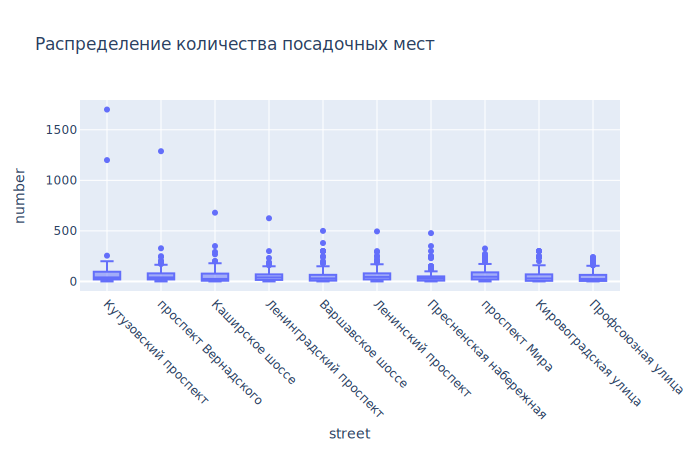

In [33]:
fig = px.box(top_10_str_data.sort_values(by='number', ascending=False), x="street", y="number",
            title= 'Распределение количества посадочных мест')
fig.update_xaxes(tickangle=45)
fig.show()

На диаграмме видно, данные неоднородные. Посмотрим распределение по среднему и медиане. 

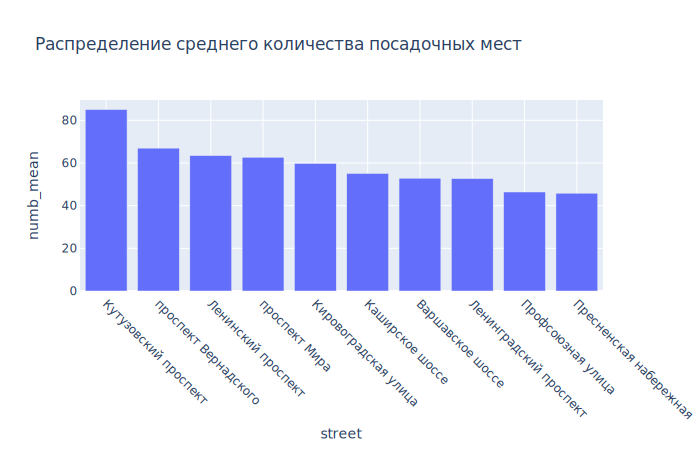

In [34]:
top_10_number = top_10_str_data\
    .groupby(['street'], as_index=False)\
    .agg({'number' : 'mean'})\
    .rename(columns={'number':'numb_mean'})
    
fig = px.bar(top_10_number.sort_values(by='numb_mean', ascending=False), 
             x='street', y='numb_mean', 
             title='Распределение среднего количества посадочных мест')
fig.update_xaxes(tickangle=45)
fig.show()

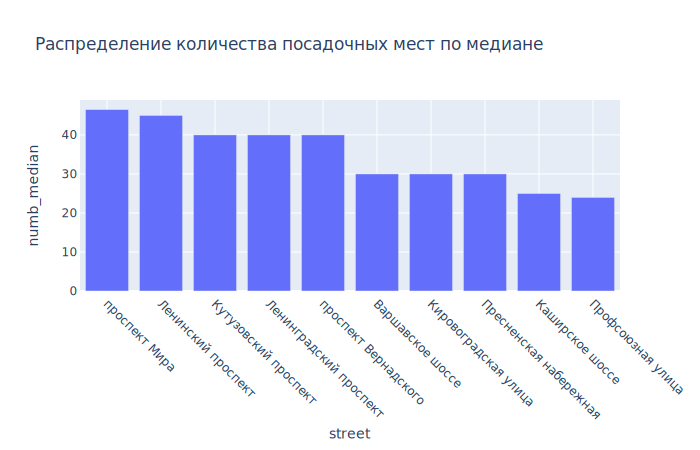

In [35]:
top_10_number_median = top_10_str_data\
    .groupby(['street'], as_index=False)\
    .agg({'number' : 'median'})\
    .rename(columns={'number':'numb_median'})
    
fig = px.bar(top_10_number_median.sort_values(by='numb_median', ascending=False), 
             x='street', y='numb_median', 
             title='Распределение количества посадочных мест по медиане')
fig.update_xaxes(tickangle=45)
fig.show()

Из-за того, что на Кутузовском и Вернадского были значительные выбросы, средние данные сильно отличаются от медианы. Второй график более точно показал, что на основных улицах все-таки преобладают заведения со средним количеством посадочных мест - медиана от 25 до 45.

<div id='step4'/>

## Общий вывод
##### Задача 1:  подготовить исследование рынка общественного питания в Москве из открытых источников. 
##### Задача 2: дать рекомендации о виде заведения, возможности развития сети, количестве посадочных мест, а также районе расположения.

##### Цель: привлечение инвестиций, чтобы открыть оригинальное кафе с роботами в Москве.  

*Перед началом работы я изучила данные: проверила таблицы на отсутствие пропусков и дубликатов, уточнила тип данных.*

#### Анализ данных
- Соотношение видов объектов общественного питания по количеству:

39,7% - кафе, 16,8% - столовая, 14,9% - закусочная, 12,5% - предприятие быстрого обслуживания. Неочевидная информация из графика - столовая и закусочная в топ-3. А ресторанов всего 5,57%.

- Соотношение сетевых и несетевых заведений по количеству:

Только 19,3% всего московского общепита входят в состав сетей, а кажется, что кругом одни «Шоколадницы» - вот она, сила бренда!
- Сетевое распространение:

Топ-3 сетевых заведений общественного питания - кафе (1396), предприятие быстрого обслуживания (791) и ресторан (544).
Сетевые заведения составляют значительную часть в трех основных категориях: кафе, ресторан, предприятие быстрого обслуживания. Для кафе и ресторанов доля сетевых около 25%, а для фастфуда - это почти половина.  

По графику совместного распределения, чаще встречаются объекты с небольшим количеством столиков.
- Среднее количество посадочных мест:
Наибольшее среднее количество посадочных мест в столовых (130), ресторанах (97), буфетах (51) и кафе (40). В фаст-фуде в среднем 20 мест, в остальных категориях - меньше 10. 
- Tоп-10 улиц Москвы по количеству объектов общественного питания:

Я убрала из топ-10 город Зеленоград и поселение Сосенское – т.к это не улицы Москвы, а районы. Оставшиеся самые популярные улицы - это проспект Мира, Профсоюзная улица, Ленинградский проспект, Пресненская набережная, Варшавское шоссе, Ленинский проспект, проспект Вернадского, Кутузовский проспект, Каширское шоссе, Кировоградская улица.

Больше всего заведений общепита на проспекте Мира, Профсоюзной улице и Ленинградском проспекте (204, 182, 171), замыкает топ-10 Кировоградская улица с 110 точками. Посмотрим, через какие районы проходят эти магистрали. Для этого я скачала базу данных из открытого источника. 

Самыми популярными у нас были проспект Мира, Профсоюзная улица и Ленинградский проспект. Можно было бы предположить, что эти улицы пролегают по особенным платежеспособным или густонаселенным районам. На деле - все три магистрали находятся в разных частях Москвы и не пересекаются между собой. Есть и районы, по которым проходит более одной из топовых улиц. Например, все Чертаново, Нагатино-Садовники, Теплый Стан - это спальные районы на юге Москвы, а не Центральный округ, как можно было бы предположить. Объединяет их всех одно – это крупные улицы, проспекты или шоссе с большим траффиком. 
- Улицы с одним объектом общественного питания:

У меня получилось 534 улицы, на которых только по одному объекту общественного питания. Судя по картографии районов, сам по себе он не имеет значения (здесь есть и центр, и окраины). Важнее протяженность и проходимость улицы - в топ 10 были крупные магистрали, которые проходят через значительную часть города, захватывая от 2х до 8ми районов (за исключением Пресненской набережной – она всего лишь огибает огромный бизнес-комплекс Москва-Сити). Здесь же представлены маленькие и отдаленные улочки.
- Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания:

Чтобы посмотреть как распределяется количество посадочных мест я построила диаграмму "ящик с усами". График показал, что есть значительные выбросы, особенно на Кутузовском проспекте и проспекте Вернадского (до 1700, 1250 мест). В основном, количество мест не превышает 250. Медиана от 25 до 45 посадочных мест – вывод: на популярных улицах больше всего заведений среднего размера, характерного для кафе.  

##### Рекомендации:
##### Самый лучший формат для популярного заведения общественного питания – кафе, с количеством посадочных мест от 30 до 40. Располагаться лучше на крупных проходимых городских магистралях, таких как проспект Мира, Профсоюзная улица или Ленинградский проспект. Хорошо, если рядом с предполагаемым местом будет располагаться крупный бизнес-центр, а лучше – несколько. Я бы не рекомендовала вкладываться в развитие сети до тех пор, пока кафе с роботами не стали бы устойчивым брендом, который привлекает посетителей, где бы оно не находилось. С другой стороны, можно открыть несколько заведений на основных магистралях, если удастся арендовать объекты с удачным расположением. 


<div id='step5'/>

## Презентация

Ссылка на презентацию:

https://drive.google.com/file/d/1TfkR7Yh-E0bpWO1lXNDvvvfdlrR1LWni/view?usp=sharing